In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def wiener_process(n, dt = 1):
    dw = np.sqrt(dt) * np.random.randn(n-1)
    W = np.concatenate([[0.], np.cumsum(dw)])
    return W

In [3]:
def compute_min_dim2D(X, epsilons):
    counts = []
    for epsilon in epsilons:
        n_intervals = int(1/epsilon)
        n_points = int(len(X)/n_intervals) ##ile punktów w interwale
        count = 0 ##hrabia ziobro
        for i in range(n_intervals):
            in_range = int((np.max(X[i*n_points:(i+1)*n_points-1]) - np.min(X[i*n_points:(i+1)*n_points-1]))/epsilon)
            count += in_range
        counts.append(count)
    logs = -np.log(np.array(epsilons))
    logN = np.log(counts)
    slope, intercept, _, _, _ = linregress(logs, logN)
    
    return slope
        

In [4]:
W = wiener_process(10000, 1/10000)

In [5]:
epsilons = []
for i in range(10):
    epsilons.append(0.5**i)
compute_min_dim2D(W, epsilons)
    


np.float64(1.572912755422815)

In [6]:
##Zajebiście

In [45]:
##modelowanie (iteracyjne) populacji na odcinku [0,1]

def add_lorentz(x,y):
    if (x+y)<0:
        return 0
    return (x+y)/(1+x*y) #populacja będzie z [0,1)
start_val = np.full(1001, 0.5) # stała populacja
grid = np.linspace(0, 1, 1001)

In [98]:
from math import *
def iterate_10percent(pop_distr):
    length=len(pop_distr)
    dd = 1/(length-1)
    next_it = np.zeros((length), dtype='float')
    for i in range(length):
        dp=0
        start = round(max(0, (i*dd-0.05)/dd))
        end = round(min(length, (i*dd+0.05)/dd))
        stim = 0 #bodziec zmiany populacji
        for j in range(start, end):
            dist = abs(i-j)*dd
            infl = sqrt(1-(20*dist)**2)/(20)
            dstim = pop_distr[i]*infl
            stim+=dstim
        stim/=pi
        growth = 0.1 *(1-16*(stim-0.5)**2)
        new_pop = add_lorentz(pop_distr[i], growth)
        new_pop*=(1-new_pop)
        # print(f"{growth}, {new_pop}")
        next_it[i]=new_pop
        
    return next_it
        

In [66]:
next_it = iterate_10percent(start_val)


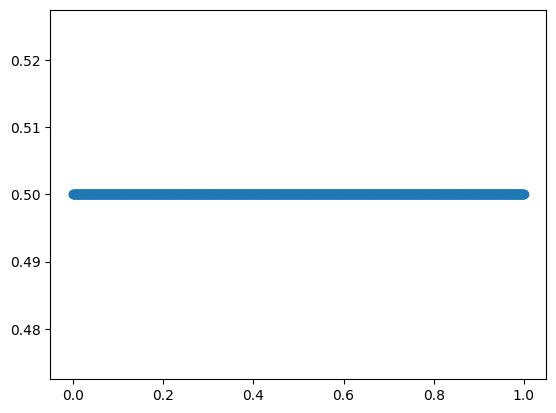

In [67]:
plt.scatter(grid, start_val)

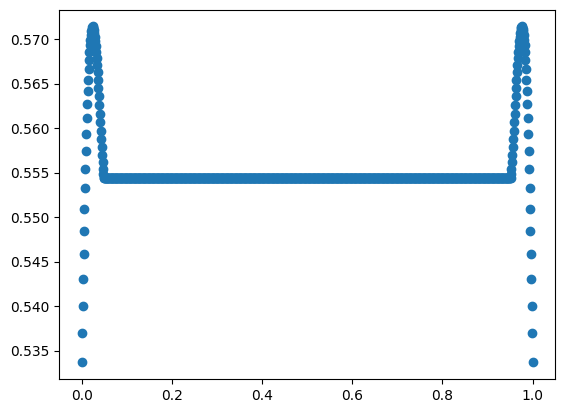

In [68]:
plt.scatter(grid, next_it)

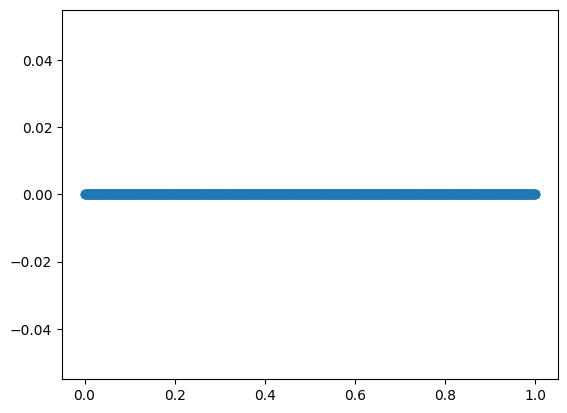

In [104]:
next_it = iterate_10percent(next_it)
plt.scatter(grid, next_it)

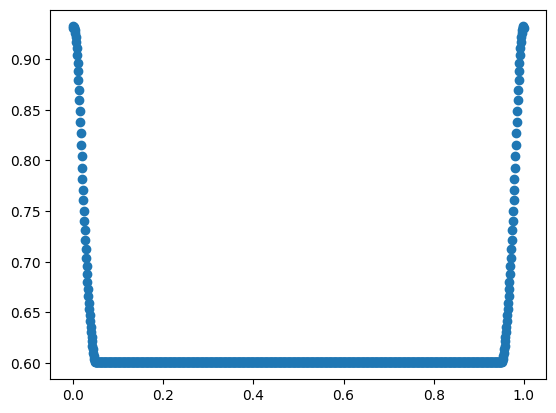

In [73]:
next_it = iterate_10percent(next_it)
plt.scatter(grid, next_it)

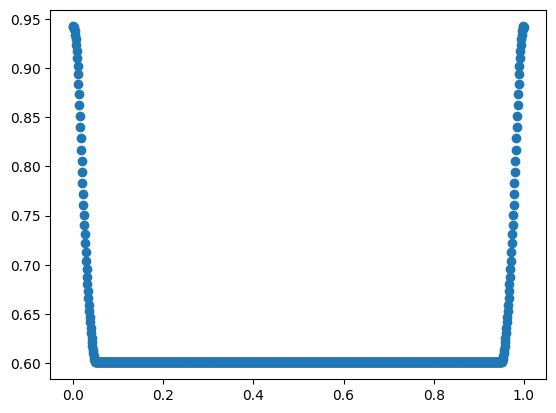

In [74]:
next_it = iterate_10percent(next_it)
plt.scatter(grid, next_it)

In [75]:
next_it[500]=0.2

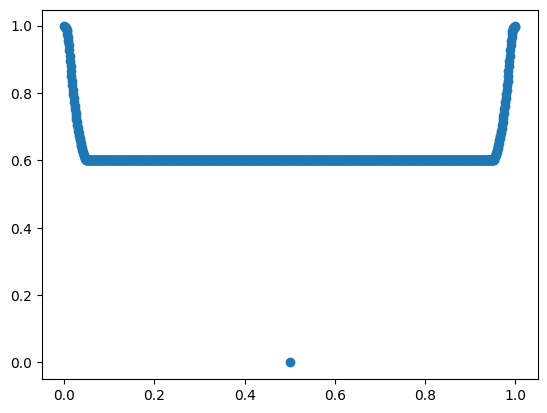

In [97]:
next_it = iterate_10percent(next_it)
plt.scatter(grid,next_it)